In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
from torch import nn
import sys
import pickle
sys.path.insert(1, '../')


from acclib.show import show_trajectories
from acclib.storage import Storage
from acclib.nets.training import *
from acclib.nets.models import ResNetLSTM, LSTM, ResNet
from acclib.nets.estimator import TrajectoryEstimator

In [68]:
path_rudacop = '/archive/shared_files/acc_to_trj/data/rudacop-public/1_rotated_2/'
storage = Storage(path_rudacop)

In [69]:
device = torch.device('cuda:0')
path = '../experiments/LAST_ResNetLSTM_on_RuDaCop/'
trend = True

In [76]:
model = ResNetLSTM([9, 64, 64, 128, 256, 64, 2, 0.01])
model.load_state_dict(torch.load(path + 'model'), strict=False)
est = TrajectoryEstimator(name='Play', model = model, device=device, 
                          window_size=200, step=20, predict_correction=False, trend=trend)

In [82]:
index = 14
acc, gyro = storage[index,'acc'], storage[index,'gyro']
trajectory_true = storage[index,'trajectory']

In [83]:
acc.head()

,tmsp,x,y,z
0,164,0.191602,-9.551338,1.870510
1,166,0.229922,-9.580078,1.947151
2,169,0.347278,-9.695040,1.949546
3,172,0.450264,-9.680670,2.124383
4,174,0.419128,-9.762100,2.129173


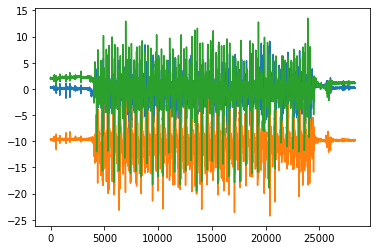

In [84]:
plt.plot(acc.values[:,1:])

In [85]:
trajectory_pred = est.predict(acc, gyro)

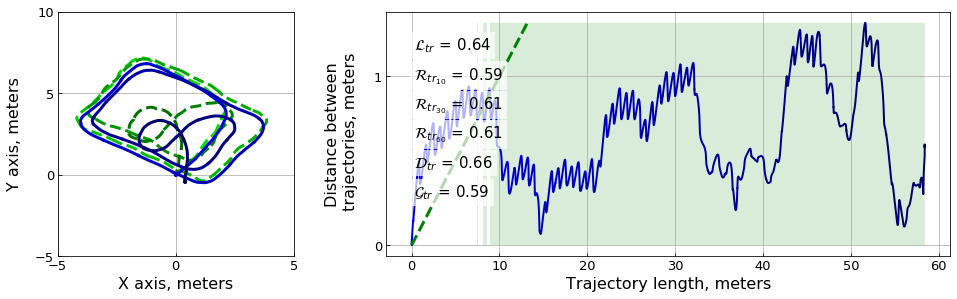

(<Figure size 1152x324 with 2 Axes>,
 {'rmse': 0.6443254671199318,
  'rte_10': 0.5865930023260655,
  'rte_30': 0.6124339233127666,
  'rte_60': 0.6134044716526081,
  'mie': 0.6601242649592615,
  'gap': 0.5939400558891967})

In [86]:
show_trajectories(trajectory_true, trajectory_pred, coordinate_columns=('x','y'))